# NLP (Natural Language Processing)

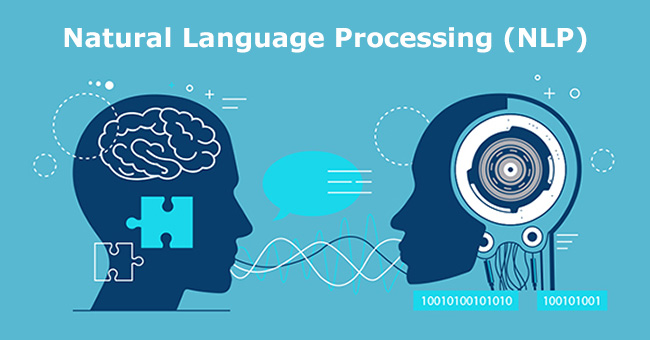

In [106]:
from IPython.display import Image, display
display(Image(filename="D:\\Picture in data\\icon\\Deshbord\\Natural-Language-Processing.jpg", width=800, height=300))

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        C:\Users\HP\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [100]:
# using a dataset from the UCI datasets!
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
for mess_no,message in enumerate(messages[:2]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...




In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names=['label','message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length'] = messages['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

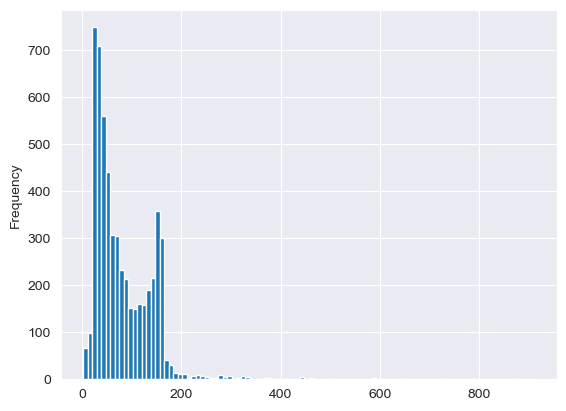

In [16]:
sns.set_style('darkgrid')
messages['length'].plot.hist(bins=100)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

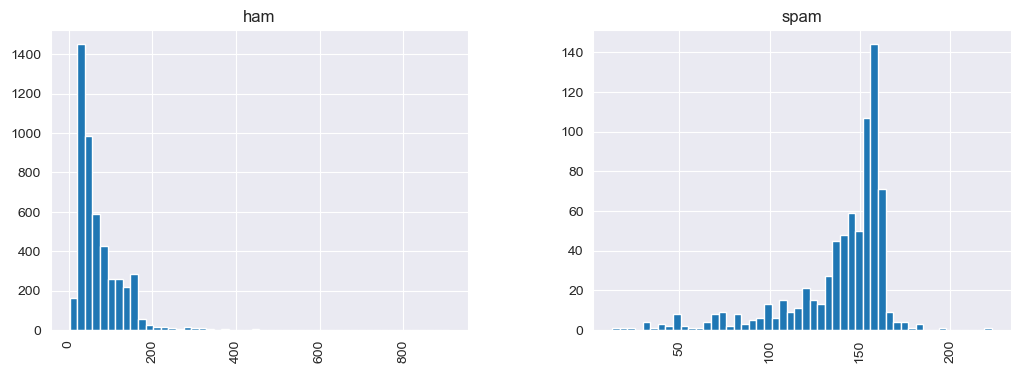

In [33]:
messages.hist(column='length',by = 'label',bins=50,figsize=(12,4))

## Text Pre-processing

In [20]:
import string

In [28]:
mess = 'sample message! notis: its has a punctuation.'

In [29]:
nopunc = [i for i in mess if i not in string.punctuation]

In [30]:
from nltk.corpus import stopwords

In [31]:
nopunc = ''.join(nopunc)

In [32]:
nopunc

'sample message notis its has a punctuation'

In [34]:
 sp= nopunc.split()

In [39]:
clean_mess = [i for i in sp if i.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['sample', 'message', 'notis', 'punctuation']

In [43]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower()not in stopwords.words('english') ]

In [44]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
tranformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [50]:
print(len(tranformer.vocabulary_))

11425


In [52]:
mess8 = messages['message'][7] 
print(mess8)

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


In [53]:
mess8 = tranformer.transform([mess8])
print(mess8)

  (0, 909)	1
  (0, 1421)	1
  (0, 1422)	1
  (0, 2814)	2
  (0, 2833)	1
  (0, 3023)	1
  (0, 3098)	1
  (0, 3278)	1
  (0, 4170)	1
  (0, 5292)	1
  (0, 5716)	1
  (0, 6719)	1
  (0, 8796)	1
  (0, 9356)	1
  (0, 9664)	1


In [58]:
print(mess8.shape)

(1, 11425)


In [61]:
tranformer.get_feature_names_out()[1422]

'Callertune'

In [62]:
mess_bow = tranformer.transform(messages['message'])

In [65]:
print('shape of sparse matrix : ',mess_bow.shape)
print('ammount of non_zero ocarences: ',mess_bow.nnz)

shape of sparse matrix :  (5572, 11425)
ammount of non_zero ocarences:  50548


In [67]:
sparsity = (100.0*mess_bow.nnz/(mess_bow.shape[0]*mess_bow.shape[1]))
print('sparsity : {}'.format(sparsity))

sparsity : 0.07940295412668218


###  TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

In [69]:
tft = TfidfTransformer().fit(mess_bow)

In [71]:
tft8 = tft.transform(mess8)
print(tft8)

  (0, 909)	0.19521918926693999
  (0, 1421)	0.24300264573542718
  (0, 1422)	0.24300264573542718
  (0, 2814)	0.5111597420715255
  (0, 2833)	0.25557987103576274
  (0, 3023)	0.25557987103576274
  (0, 3098)	0.25557987103576274
  (0, 3278)	0.23042542043509162
  (0, 4170)	0.25557987103576274
  (0, 5292)	0.24300264573542718
  (0, 5716)	0.2271572158061633
  (0, 6719)	0.17915298079494393
  (0, 8796)	0.17316925291900245
  (0, 9356)	0.23042542043509162
  (0, 9664)	0.2056563071413685


In [74]:
tft.idf_[tranformer.vocabulary_['university']]

8.527076498901426

In [75]:
message_tft =tft.transform(mess_bow)

## Training a model

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
spam_detect_model =MultinomialNB().fit(message_tft,messages['label'])

In [79]:
spam_detect_model.predict(tft8)[0]

'ham'

In [80]:
messages['label'][7]

'ham'

## Model Evaluation

In [81]:
all_pred =spam_detect_model.predict(message_tft)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [87]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## Train Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=.2)

In [90]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


## Creating a Data Pipeline

In [92]:
from sklearn.pipeline import Pipeline

In [95]:
pipeline  = Pipeline([
    ('bow',CountVectorizer(analyzer= text_process)),
    ('tft',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [96]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002031258EA60>)),
                ('tft', TfidfTransformer()), ('classifier', MultinomialNB())])

In [97]:
prediction = pipeline.predict(msg_test)

In [99]:
print(classification_report(prediction,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.73      1.00      0.85       101

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115



## Thank you
**https://www.linkedin.com/in/monirul-m08/
https://github.com/MonirulIslamm08
md08monirul@gmail.com**